In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import time

In [2]:
#Reading dataset
data=pd.read_csv("unified_anomaly_dataset_20percent.csv")
data=data.drop(labels=['timestamp', 'location'],axis=1)

#Modifying string variables

df = data.replace({True: 1, False: 0, 'idle': 0, 'heating': 1,
    'cooling': 2,
    'off': 0,
    'on': 1})

# Show the updated DataFrame
df.head()

C:\Users\betty\AppData\Local\Temp\ipykernel_29056\4073431610.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = data.replace({True: 1, False: 0, 'idle': 0, 'heating': 1,


,room_temperature,target_temperature,temp_diff,hvac_status,is_day,day_type,intensity,state,motion,anomaly
0,72.002,72.0,0.002,0,1,0.0,90.0,1,0,0
1,71.998,72.0,0.002,0,1,0.0,17.0,1,0,1
2,71.995,72.0,0.005,0,1,0.0,17.0,0,0,0
3,72.034,72.0,0.034,0,1,0.0,17.0,0,1,0
4,72.206,72.0,0.206,0,1,0.0,82.0,1,0,1


<Axes: >

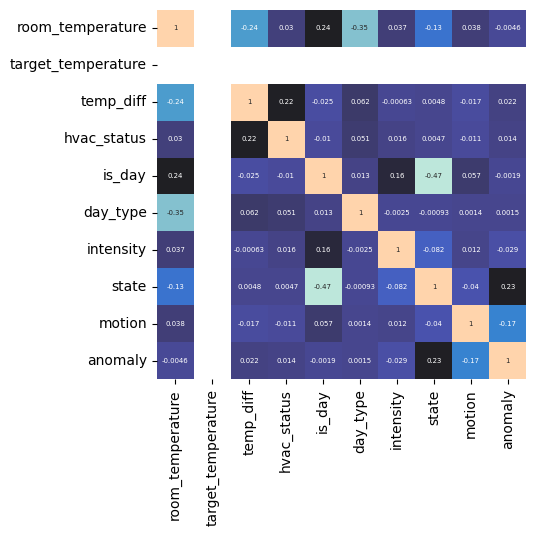

In [3]:
#Correlation between variables

sns.heatmap(df.corr(),annot=True,annot_kws={"size": 5},square=True,cmap='icefire',cbar=False)

In [4]:
#Setting up X and Y
X=df.filter(['room_temperature', 'target_temperature', 
               'temp_diff', 'hvac_status', 'is_day', 
               'day_type', 'intensity', 'state', 
               'motion'])
Y=data.filter(['anomaly'])

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)


In [5]:
#Training the model
start_time = time.time()
clf = DecisionTreeClassifier(criterion='gini', random_state=42,  max_depth=5)
clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time
print(f"Training time: {execution_time:.6f} seconds")

Training time: 0.122843 seconds


Testing time: 0.009979 seconds
Accuracy Score: 0.6525495060470473
Classification Report:
              precision    recall  f1-score   support

        True       0.63      0.78      0.70     11569
       False       0.69      0.51      0.59     11004

    accuracy                           0.65     22573
   macro avg       0.66      0.65      0.64     22573
weighted avg       0.66      0.65      0.65     22573



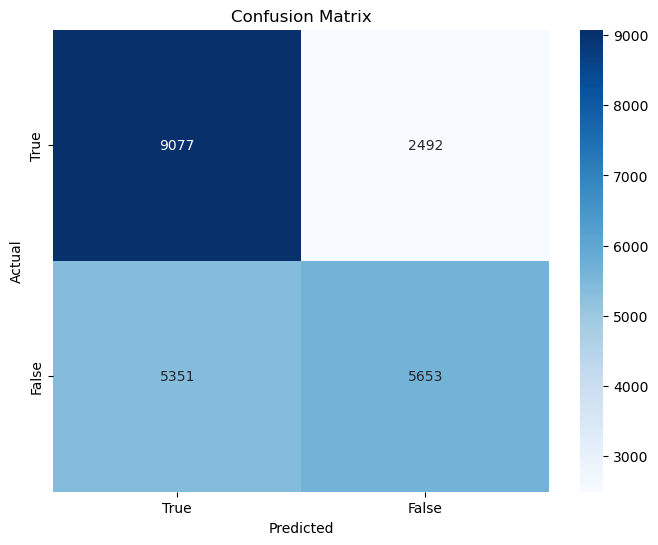

In [6]:
#Testing
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()

execution_time = end_time - start_time
print(f"Testing time: {execution_time:.6f} seconds")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['True', 'False']))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

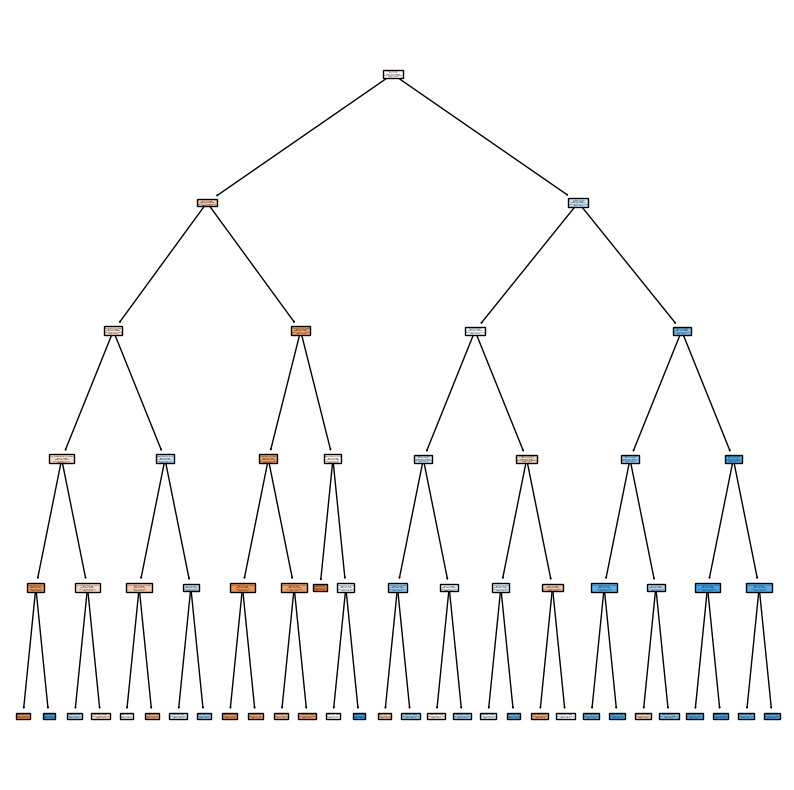

In [7]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names=['room_temperature', 'target_temperature', 
               'temp_diff', 'hvac_status', 'is_day', 
               'day_type', 'intensity', 'state', 
               'motion'], class_names=['True', 'False'], filled=True)
plt.show()

In [8]:
import pickle

# save
with open('CART20General.pkl','wb') as f:
    pickle.dump(clf,f)